In [14]:
%% Machine Learning Online Class
%  Exercise 7 | Principle Component Analysis and K-Means Clustering
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     pca.m
%     projectData.m
%     recoverData.m
%     computeCentroids.m
%     findClosestCentroids.m
%     kMeansInitCentroids.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc
graphics_toolkit ("gnuplot");
page_output_immediately(1);

Visualizing example dataset for PCA.



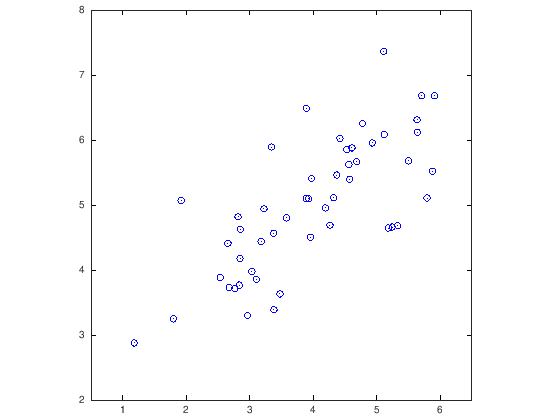

In [15]:
%% ================== Part 1: Load Example Dataset  ===================
%  We start this exercise by using a small dataset that is easily to
%  visualize
%
fprintf('Visualizing example dataset for PCA.\n\n');

%  The following command loads the dataset. You should now have the 
%  variable X in your environment
load ('ex7data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

In [16]:
%% =============== Part 2: Principal Component Analysis ===============
%  You should now implement PCA, a dimension reduction technique. You
%  should complete the code in pca.m
%
fprintf('\nRunning PCA on example dataset.\n\n');

%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Compute mu, the mean of the each feature


Running PCA on example dataset.



Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)


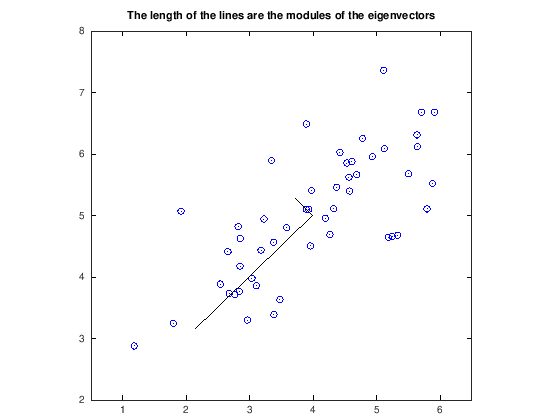

In [17]:
%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

%  Draw the eigenvectors centered at mean of data. These lines show the
%  directions of maximum variations in the dataset.
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
title('The length of the lines are the modules of the eigenvectors')
hold off;

fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));
fprintf('\n(you should expect to see -0.707107 -0.707107)\n');


Dimension reduction on example dataset.



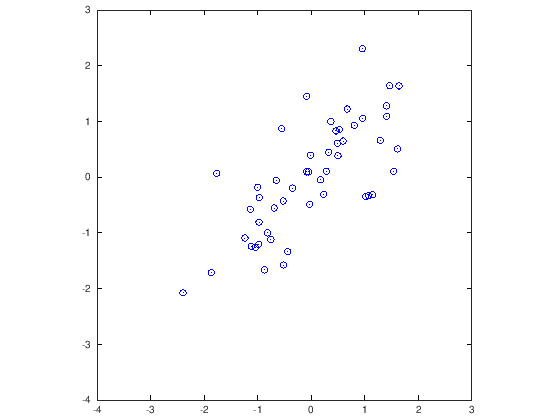

In [8]:
%% =================== Part 3: Dimension Reduction ===================
%  You should now implement the projection step to map the data onto the 
%  first k eigenvectors. The code will then plot the data in this reduced 
%  dimensional space.  This will show you what the data looks like when 
%  using only the corresponding eigenvectors to reconstruct it.
%
%  You should complete the code in projectData.m
%
fprintf('\nDimension reduction on example dataset.\n\n');

%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

In [19]:
%  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
fprintf('Projection of the first example: %f\n', Z(1));
fprintf('\n(this value should be about 1.481274)\n\n');

X_rec  = recoverData(Z, U, K);
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));
fprintf('\n(this value should be about  -1.047419 -1.047419)\n\n');

Projection of the first example: 1.481274

(this value should be about 1.481274)

Approximation of the first example: -1.047419 -1.047419

(this value should be about  -1.047419 -1.047419)



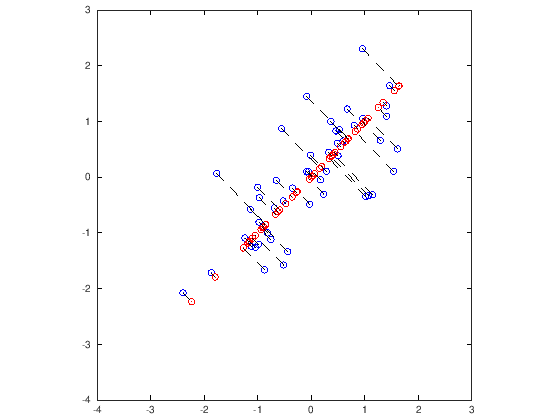

In [20]:
%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

%  Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off


Loading face dataset.



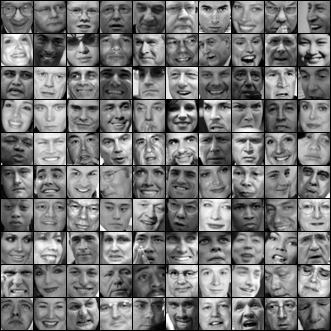

In [90]:
%% =============== Part 4: Loading and Visualizing Face Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  The following code will load the dataset into your environment
%
fprintf('\nLoading face dataset.\n\n');

%  Load Face dataset
load ('ex7faces.mat')

%  Display the first 100 faces in the dataset
displayData(X(1:100, :));


Running PCA on face dataset.
(this might take a minute or two ...)



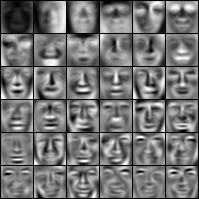

In [91]:
%% =========== Part 5: PCA on Face Data: Eigenfaces  ===================
%  Run PCA and visualize the eigenvectors which are in this case eigenfaces
%  We display the first 36 eigenfaces.
%
fprintf(['\nRunning PCA on face dataset.\n' ...
         '(this might take a minute or two ...)\n\n']);

%  Before running PCA, it is important to first normalize X by subtracting 
%  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Visualize the top 36 eigenvectors found
displayData(U(:, 1:36)');

In [92]:
%% ============= Part 6: Dimension Reduction for Faces =================
%  Project images to the eigen space using the top k eigenvectors 
%  If you are applying a machine learning algorithm 
fprintf('\nDimension reduction for face dataset.\n\n');

K = 100;

Z = projectData(X_norm, U, K);

disp(['Original size of dataset: ', num2str(size(X_norm))])
fprintf('The projected data Z has a size of: ')
fprintf('%d ', size(Z));


Dimension reduction for face dataset.

Original size of dataset: 5000  1024
The projected data Z has a size of: 5000 100 

In [93]:
varVec = diag(S)/trace(S);
varRetained = cumsum(varVec);
varVec(1:5)', varRetained(1:5)'

disp(['100 PCs retain a variance of: ', num2str(varRetained(100))])

ans =

   0.329126   0.127870   0.053412   0.038799   0.032385

ans =

   0.3291   0.4570   0.5104   0.5492   0.5816

100 PCs retain a variance of: 0.93193


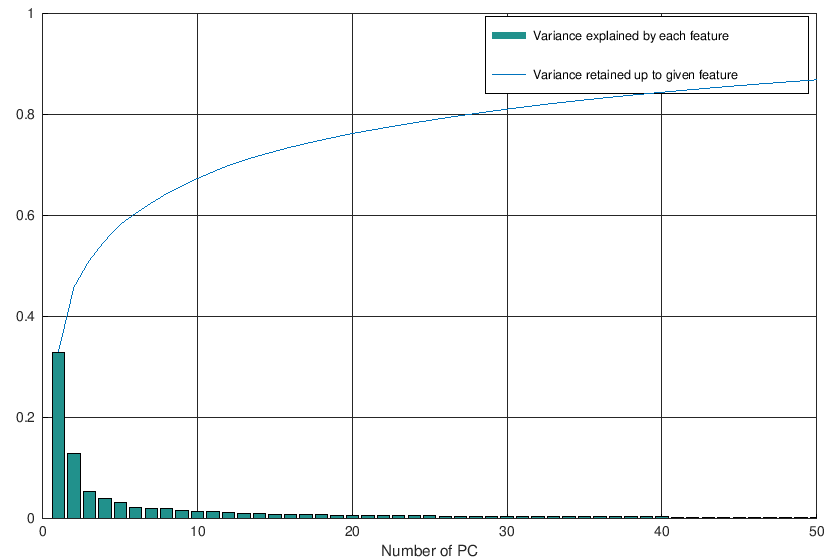

In [94]:
maxX = 50;
hold on
bar((varVec(1:maxX)))
plot(cumsum(varVec(1:maxX)))
xlim([0 maxX])
xlabel 'Number of PC';
legend(['Variance explained by each feature'; 'Variance retained up to given feature']);
grid()
pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3), pos(3)]);

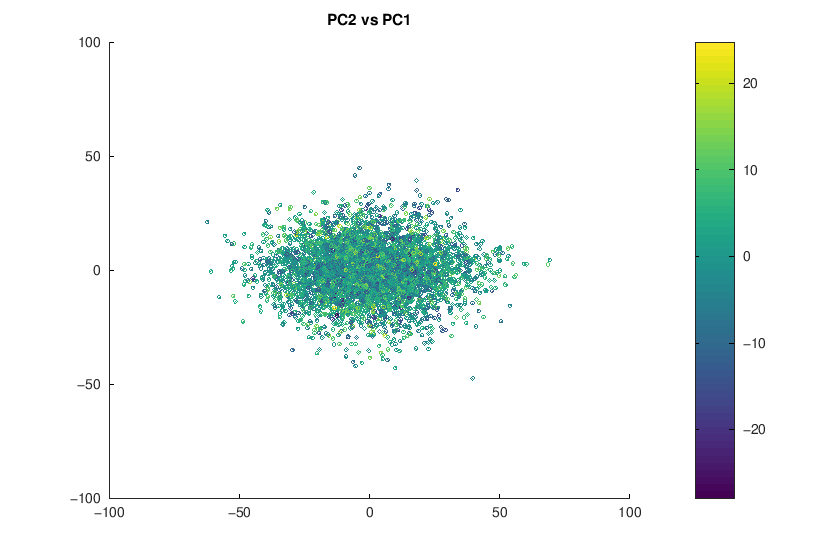

In [95]:
scatter(Z(:,1), Z(:,2), 100, Z(:,3))
pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3),pos(3)]);
axis([-100 100 -100 100])
% axis square
colorbar()
title('PC2 vs PC1')

In [96]:
%% ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
%  Project images to the eigen space using the top K eigen vectors and 
%  visualize only using those K dimensions
%  Compare to the original input, which is also displayed

fprintf('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100;
X_rec  = recoverData(Z, U, K);


Visualizing the projected (reduced dimension) faces.



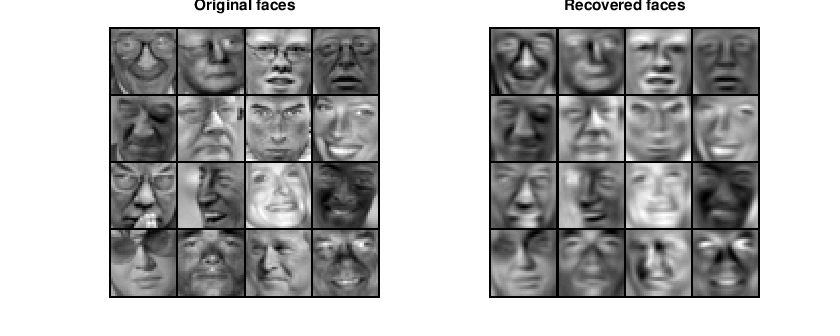

In [97]:
% Display normalized data
subplot(1, 2, 1);
displayData(X_norm(1:16,:));
title('Original faces');
axis square;

% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
displayData(X_rec(1:16,:));
title('Recovered faces');
axis square;

pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3),pos(3)*0.6]);

In [98]:
%% === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
%  One useful application of PCA is to use it to visualize high-dimensional
%  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
%  pixel colors of an image. We first visualize this output in 3D, and then
%  apply PCA to obtain a visualization in 2D.

close all; close all; clc

% Reload the image from the previous exercise and run K-Means on it
% For this to work, you need to complete the K-Means assignment first
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);
K = 16; 
max_iters = 10;
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


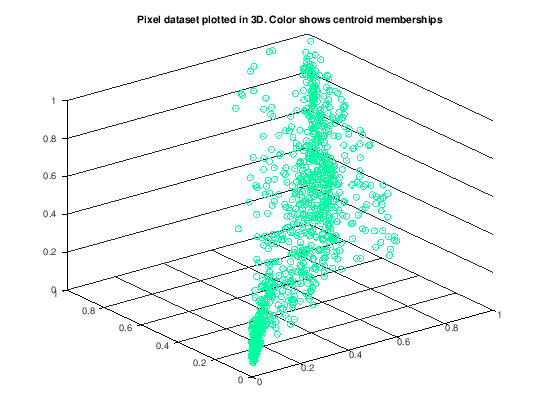

In [99]:
%  Sample 1000 random indexes (since working with all the data is
%  too expensive. If you have a fast computer, you may increase this.
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

%  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);

%  Visualize the data and centroid memberships in 3D
figure;
scatter3(X(sel, 1), X(sel, 2), X(sel, 3), 300, colors);
title('Pixel dataset plotted in 3D. Color shows centroid memberships');

In [101]:
%% === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
% Use PCA to project this cloud to 2D for visualization

% Subtract the mean to use PCA
[X_norm, mu, sigma] = featureNormalize(X);

% PCA and project the data to 2D
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

In [102]:
varVec = diag(S)/trace(S);
varRetained = cumsum(varVec);
varVec', varRetained'

disp(['2 PCs retain a variance of: ', num2str(varRetained(2))])

ans =

   9.1352e-01   7.9902e-02   6.5830e-03

ans =

   0.9135   0.9934   1.0000

2 PCs retain a variance of: 0.99342


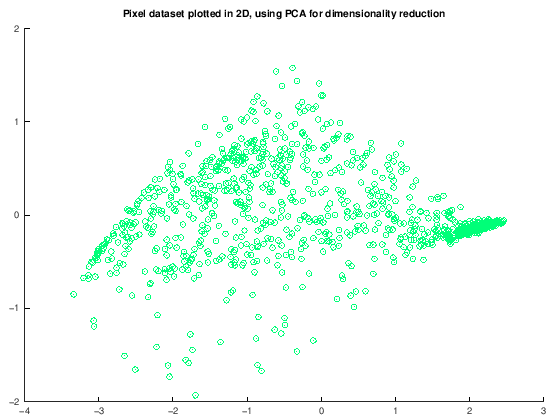

In [103]:
% Plot in 2D
figure;
plotDataPoints(Z(sel, :), idx(sel), K);
title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');

In [115]:
fprintf('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 2;
X_rec  = recoverData(Z, U, K);
X_rec = reshape(X_rec, img_size(1), img_size(2), 3);


Visualizing the projected (reduced dimension) faces.



Color is slightly off due to normalization



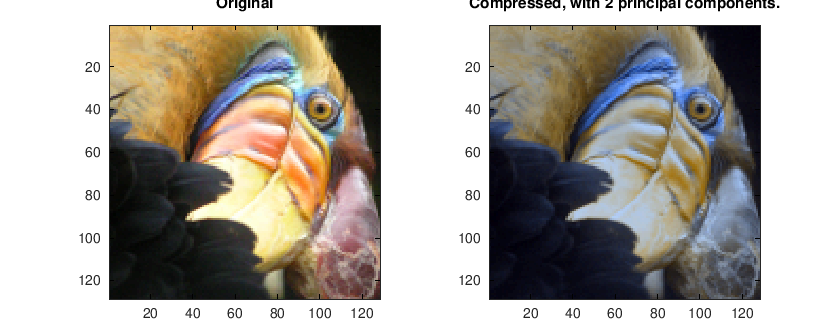

In [132]:
% Display the original image 

subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_rec)

pos = get(gcf,'Position'); 
set(gcf, 'Position', [0,0,3/2*pos(3),pos(3)*0.6]);

title(sprintf('Compressed, with %d principal components.', K));

disp(['Color is slightly off due to normalization', char(10)])